In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [2]:
def gen_data(amount, logic_gate):
    data = []
    for _ in range(amount):
        q, p = randint(0,1), randint(0,1)
        data.append([q,p,int(logic_gate(q,p))])
    return np.array(data)

In [3]:
def test_activation(func, min, max, step):
    x = np.arange(min, max, step)
    y = [func(i) for i in x ]
    plt.figure(figsize=(10,10))
    plt.plot(x,y,label='sigmoid')
    plt.show()

def sigmoid(x) -> float:
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.array(max(0, x)).reshape((1,1))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)).reshape((1,1))

def heasidive(x):
    return 1 if x >= 0 else 0

def prercept_error(y_hat, y):
    return  y - y_hat

In [4]:
class Neuron:
    def __init__(self, activation, input_size = 2) -> None:
        self.activation = activation
        self.input_size = (1,input_size)
        self.weights = np.random.rand(input_size).reshape(self.input_size)
        self.bias = 0
    
    def forward(self, x):
        weighted = x @ self.weights.T
        biased = weighted + self.bias
        return self.activation(biased)
    
    def backward(self, x, y, y_hat, lr):
        error = self._error_function(y, y_hat)
        dC_dw = x.T @ error
        dC_db = np.sum(error)
        self.weights += (lr * dC_dw).T
        self.bias += lr * dC_db

    def fit(self, x_data, y_data, lr, epoch):
        error_plot = []
        for e in range(epoch):
            total_cost = 0
            for x, y in zip(x_data, y_data):
                x = x.reshape(self.input_size)
                y_hat = self.forward(x)
                self.backward(x, y, y_hat, lr)
                total_cost += self.cost_function(y, y_hat)
            error_plot.append([e + 1, total_cost / len(x_data)])
        return np.array(error_plot)

    def _error_function(self, y, y_hat):
        return y - y_hat
    
    def cost_function(self, y, y_hat):
        return np.mean((y - y_hat) ** 2)

class Perceptron(Neuron):
    def __init__(self, activation, input_size = 2) -> None:
        super().__init__(activation, input_size)
        self.weights = np.zeros(self.input_size)

    def backward(self, x, y, y_hat, lr):
        error = self._error_function(y, y_hat)
        self.weights += lr * error * x
        self.bias += lr * error

In [5]:
and_data = gen_data(1000, np.logical_and)
or_data = gen_data(1000, np.logical_or)

In [6]:
p_and = Perceptron(heasidive)
p_or = Perceptron(heasidive)

In [7]:
n_and_sigmoid = Neuron(sigmoid)
n_and_relu = Neuron(relu)
n_and_tanh = Neuron(tanh)
n_or_sigmoid = Neuron(sigmoid)
n_or_relu = Neuron(relu)
n_or_tanh = Neuron(tanh)

In [8]:
perceptron_and_data = p_and.fit(and_data[:,:2], and_data[:,2], 0.1, 100)
perceptron_or_data = p_or.fit(or_data[:,:2], or_data[:,2], 0.1, 100)
neuron_and_data_sigmoid = n_and_sigmoid.fit(and_data[:,:2], and_data[:,2], 0.01, 100)
neuron_and_data_relu = n_and_relu.fit(and_data[:,:2], and_data[:,2], 0.01, 100)
neuron_and_data_tanh = n_and_tanh.fit(and_data[:,:2], and_data[:,2], 0.0001, 100)
neuron_or_data_sigmoid = n_or_sigmoid.fit(or_data[:,:2], or_data[:,2], 0.01, 100)
neuron_or_data_relu = n_or_relu.fit(or_data[:,:2], or_data[:,2], 0.01, 100)
neuron_or_data_tanh = n_or_tanh.fit(or_data[:,:2], or_data[:,2], 0.0001, 100)

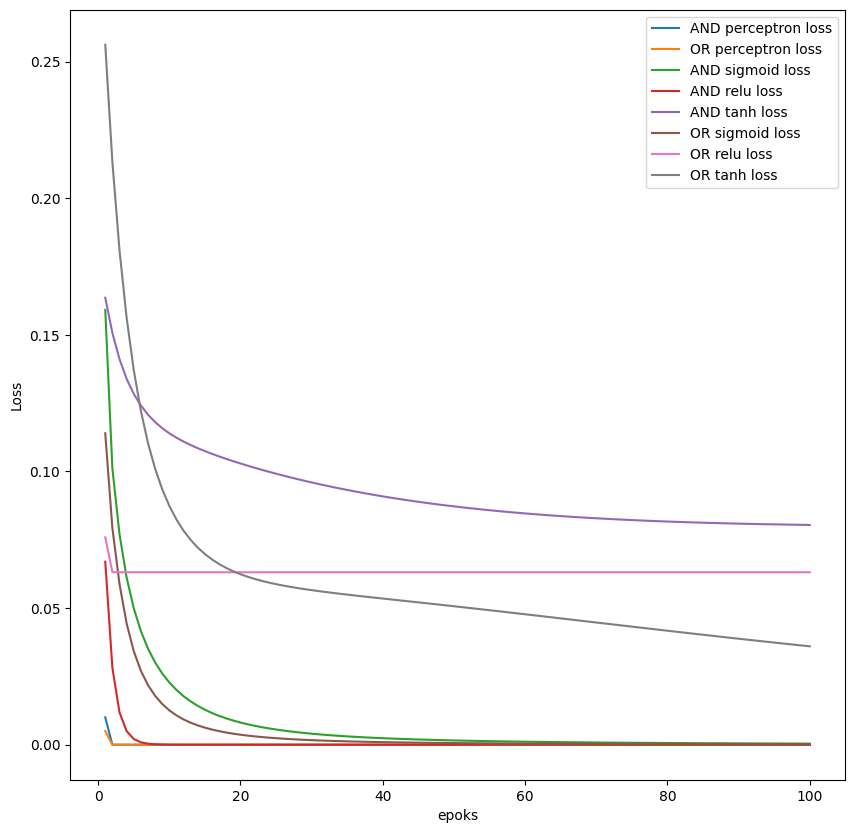

In [16]:
plt.figure(figsize=(10,10))
plt.plot(perceptron_and_data[:,0], perceptron_and_data[:,1], label='AND perceptron loss')
plt.plot(perceptron_or_data[:,0], perceptron_or_data[:,1], label='OR perceptron loss')
plt.plot(neuron_and_data_sigmoid[:,0], neuron_and_data_sigmoid[:,1], label='AND sigmoid loss')
plt.plot(neuron_and_data_relu[:,0], neuron_and_data_relu[:,1], label='AND relu loss')
plt.plot(neuron_and_data_tanh[:,0], neuron_and_data_tanh[:,1], label='AND tanh loss')
plt.plot(neuron_or_data_sigmoid[:,0], neuron_or_data_sigmoid[:,1], label='OR sigmoid loss')
plt.plot(neuron_or_data_relu[:,0], neuron_or_data_relu[:,1], label='OR relu loss')
plt.plot(neuron_or_data_tanh[:,0], neuron_or_data_tanh[:,1], label='OR tanh loss')
plt.xlabel('epoks')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
n_or_sigmoid.forward(np.array([0,0]).reshape((1,2)))

array([[0.02240126]])

In [11]:
p_and.forward(np.array([0,0]))

0

In [12]:
p_or.weights
p_or.bias

-0.1

In [13]:
p_and.bias

-0.2